## Compulsory Task 1

In [58]:
# Importing Necessary Modules. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score 

### Loading the Data

In [59]:
# Reading in data from 'Iris.csv' file and storing in a dataframe.
df = pd.read_csv('Iris.csv', encoding='unicode_escape')

# Displaying first 5 rows of dataframe.
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Plotting Scatterplots of Variables.
Here, 6 different scatterplots showing varying combinations of variables are created:

<AxesSubplot: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

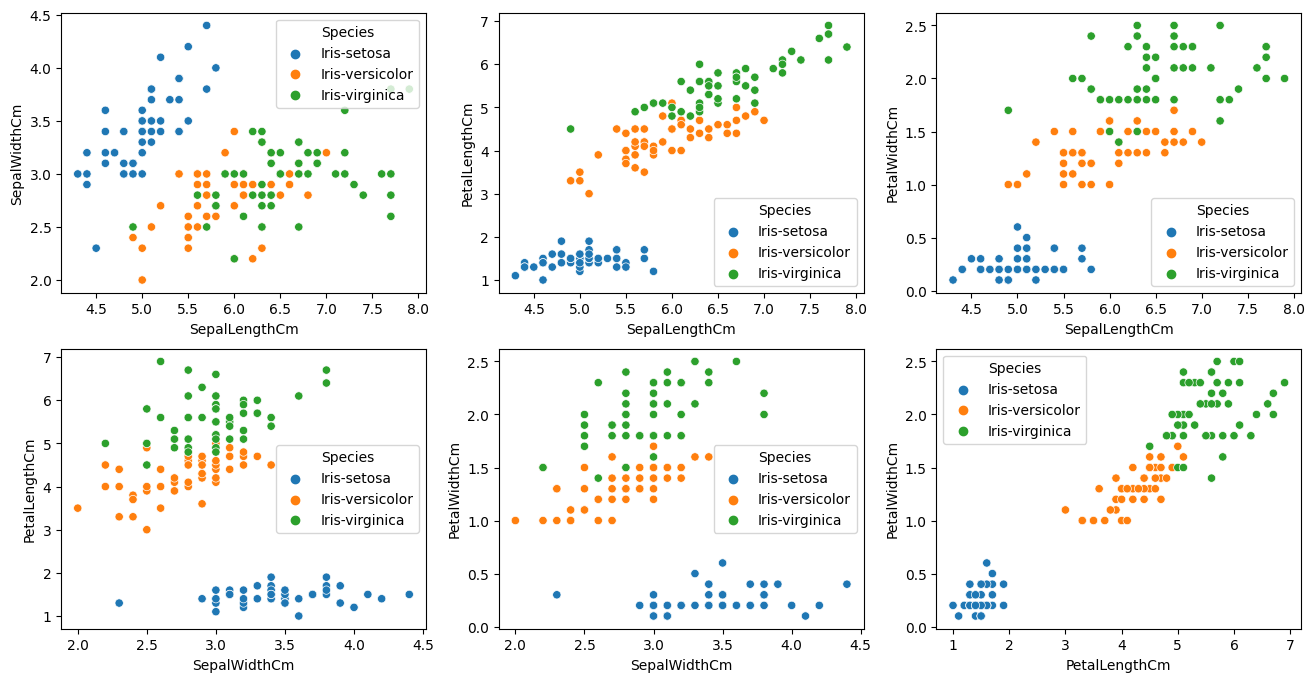

In [60]:
# Creating a subplot with 2 rows and 3 columns.
fig, axes = plt.subplots(2,3, figsize=(16,8))

# Plotting different combinations of variables on each subplot.
sns.scatterplot(ax = axes[0,0], data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
sns.scatterplot(ax = axes[0,1], data=df, x='SepalLengthCm', y='PetalLengthCm', hue='Species')
sns.scatterplot(ax = axes[0,2], data=df, x='SepalLengthCm', y='PetalWidthCm', hue='Species')
sns.scatterplot(ax = axes[1,0], data=df, x='SepalWidthCm', y='PetalLengthCm', hue='Species')
sns.scatterplot(ax = axes[1,1], data=df, x='SepalWidthCm', y='PetalWidthCm', hue='Species')
sns.scatterplot(ax = axes[1,2], data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')

The most promising plot to separate into clusters:
* Petal Length vs Petal Width (Plot 6)

This is because there is very little overlap between clusters and datapoints the in clusters are very close together (little variation within clusters).

### Petal Length vs. Petal Width
As this is the most promising plot, a K-means model with k=3 is created with these features:

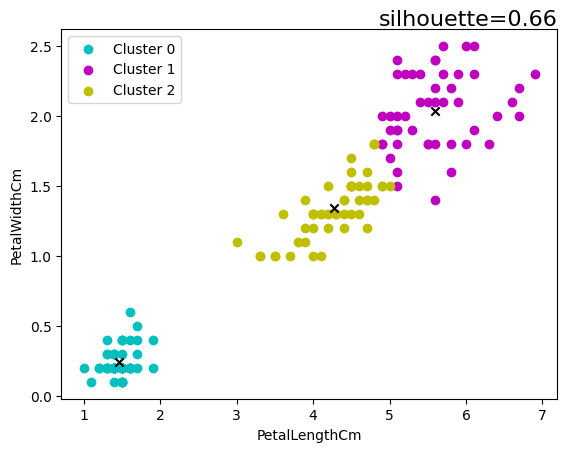

In [61]:
# Features of interest are used as X-variable
X = df[['PetalLengthCm','PetalWidthCm']].values.reshape(-1,2)
k=3

# K-means model is trained and used to make a prediction.
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=123)
y_pred = kmeans.fit_predict(X)

# Clusters predicted are plotted onto a scatter plot and are colour-coded. 
colours = 'cmy'
for c in range(k):
  plt.scatter(X[y_pred == c, 0], X[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
  plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')

# Accuracy is calculated by finding silhouette score.
score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)

plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()

### Sepal Length vs. Petal Length

The second most-promising plot was Sepal Length vs. Petal Length. A K-means model was also built for this:

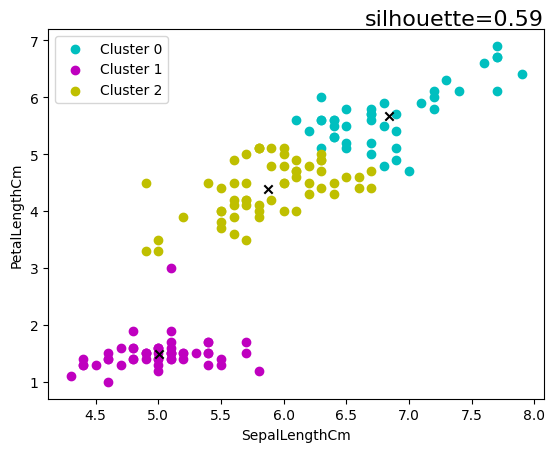

In [62]:
# Features of interest are used as X-variable
X = df[['SepalLengthCm','PetalLengthCm']].values.reshape(-1,2)
k=3

# K-means model is trained and used to make a prediction.
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=123)
y_pred = kmeans.fit_predict(X)

# Clusters predicted are plotted onto a scatter plot and are colour-coded. 
colours = 'cmy'
for c in range(k):
  plt.scatter(X[y_pred == c, 0], X[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
  plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')

# Accuracy is calculated by finding silhouette score.
score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)

plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend()
plt.show()

As the Silhouette Score was higher for Petal Length vs. Petal Width, these features are better for and more accurate at separating the datapoints into distinct clusters. 